## Import libraries




In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


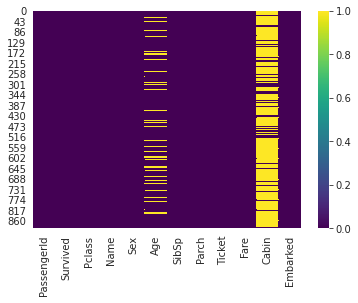

In [ ]:
sns.heatmap(train.isnull(),cmap='viridis')

From th-re heatmap, it is very clear that most of the null values are in "age" and "cabin"

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


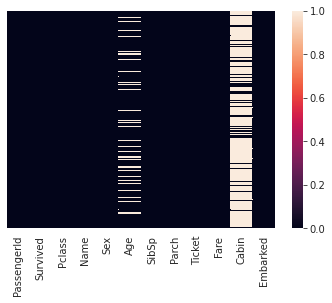

In [ ]:
sns.heatmap(train.isnull(), yticklabels= False)

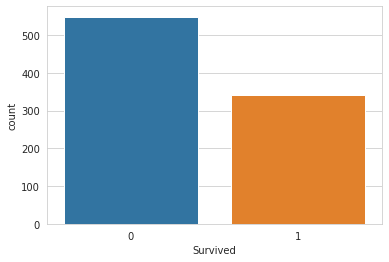

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', data=train)

the above graph shows the no of surviver

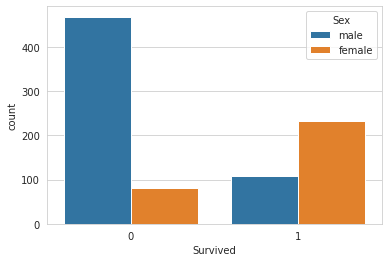

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

The above graph shows the no of surviver amng male and female

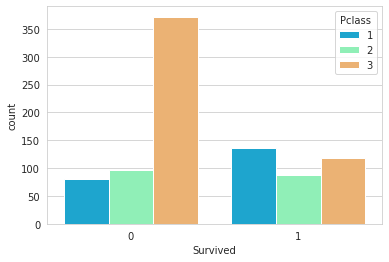

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

the above graph shows the no of surviver on the basis of pasengerclass

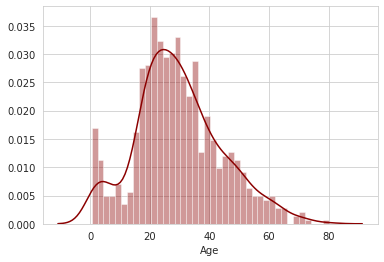

In [ ]:
sns.distplot(train['Age'].dropna(), color = 'darkred', bins =40)

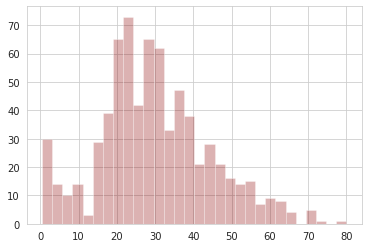

In [ ]:
train['Age'].hist(bins=30,color='darkred', alpha = 0.3)

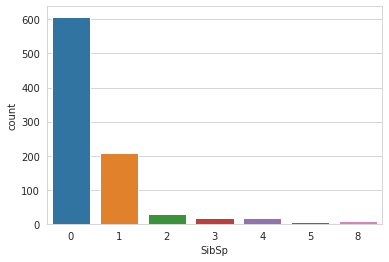

In [ ]:
sns.countplot(x = 'SibSp', data =train)

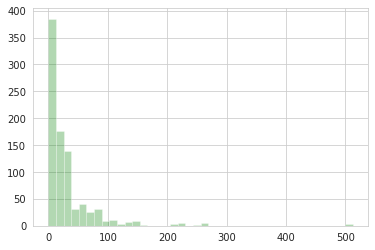

In [ ]:
train['Fare'].hist(color='green', bins =40, alpha=0.3)

## Data Cleaning

Removing null value

We want to fill in missing age data instead of just dropping the mising age data rows. One way to do this is by filling mean age of al the passengers(imputation). However we can be smarter about this and check the average age by passenger class.

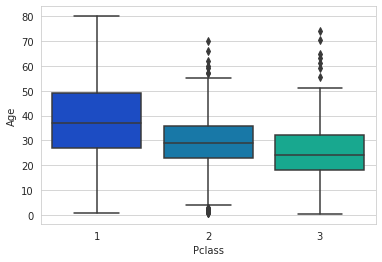

In [ ]:

sns.boxplot(x = 'Pclass', y='Age', data = train, palette='winter')

#we create box plot to ffind the avg between two class.

the middle line in box plot is avg line

In [ ]:
def age_pclass_ki_relation(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):    #if class of age has null value the check passengerclas
     if Pclass == 1:
       return 37     #return 37 bcuz avg age of pclass 1 is 37
     elif Pclass == 2:
       return 29
     else: 
        return 24
  else:     # if age is not null then return age
    return Age

In [ ]:
train['Age']=train[['Age', 'Pclass']].apply(age_pclass_ki_relation,axis=1)

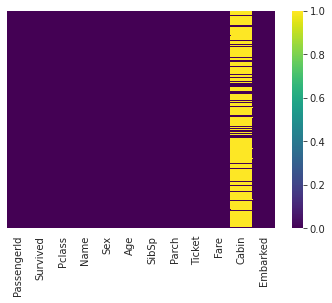

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

As we can see that age column is not null anymore 
Now the problem with cabin is that cabin has many null values and to replace so many null values we need feature engineering. So lets just drop this column

In [ ]:
train = train.loc[~train['Cabin'].isnull()]

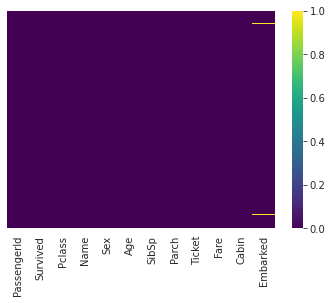

In [ ]:
sns.heatmap(train.isnull(), yticklabels= False, cmap = 'viridis')

So now our heat map shows that we have no null values in the data.

In [ ]:
#another way to drop cabin null values is :
train.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 19.1+ KB


Features like Passenger Id Name Ticket are not very important.

Now Sex, Embarked are the features which we need to convert into integer in order to use them during machine learning algorithm

We will convert categorical features into dummy variabls using pandas.

##Converting Categorical Features

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first = True)


In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first = True) # we removed first column because we know two values so third value will be known to us.

In [ ]:
train.drop(['Sex', 'Name', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [ ]:
train = pd.concat([train, sex, embark], axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


Now my data is ready with only int values 

##Building Logistic Regression Model!

###Train Test split

In [ ]:
train.drop('Survived', axis = 1,).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,38.0,1,0,71.2833,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1
6,7,1,54.0,0,0,51.8625,1,0,1
10,11,3,4.0,1,1,16.7000,0,0,1
11,12,1,58.0,0,0,26.5500,0,0,1


In [ ]:
train['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'], test_size=0.30,random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test, prediction)

In [ ]:
accuracy

array([[12,  5],
       [ 7, 38]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, prediction)
accuracy  #80% is the accuracy

0.8064516129032258

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])